# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities[1]

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Lists to store the retrieved data from openweathermap API
cityw = []
latw = []
lngw = [] 
max_tempw = []
humidityw = []
cloudinessw = []
wsw = []
countryw = []
datew = []

# variables to store Processing Records and their sets
counter = 1
set_counter = 1

base_url = "https://api.openweathermap.org/data/2.5/weather?"
# query_url = base_url + "appid=" + weather_api_key + "&q=" + cities[1] + "&units=imperial"
# response = requests.get(query_url).json()
# response

print("Beginning Data Retrieval")
print("-" * 30)

# Loop through the API and get the data
for city in cities:
    url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"   
    response = requests.get(url).json()
    response  
    
    # For every API successful call, store data in a list else display Error message    
    try:
        
        print("Processing Record " + str(counter) + " of Set " + str(set_counter) + "| "+ city + ".")
        
        cityw.append(response['name'])
        countryw.append(response['sys']['country'])
        latw.append(response['coord']['lat'])
        lngw.append(response['coord']['lon'])
        datew.append(response['dt'])
        cloudinessw.append(response['clouds']['all'])
        humidityw.append(response['main']['humidity'])
        max_tempw.append(response['main']['temp_max'])
        wsw.append(response['wind']['speed'])
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
    counter = counter+1
    if counter > 50 :
        set_counter+= 1
        counter = 1
   
                   
print(" End of Data Retrival.")



Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1| vaini.
Processing Record 2 of Set 1| sampit.
Processing Record 3 of Set 1| barrow.
Processing Record 4 of Set 1| georgetown.
Processing Record 5 of Set 1| mutsamudu.
City not found. Skipping...
Processing Record 6 of Set 1| busselton.
Processing Record 7 of Set 1| puerto narino.
Processing Record 8 of Set 1| sale.
Processing Record 9 of Set 1| ilulissat.
Processing Record 10 of Set 1| lodwar.
Processing Record 11 of Set 1| hilo.
Processing Record 12 of Set 1| mataura.
Processing Record 13 of Set 1| cape town.
Processing Record 14 of Set 1| chokurdakh.
Processing Record 15 of Set 1| lorengau.
Processing Record 16 of Set 1| mirabad.
Processing Record 17 of Set 1| punta arenas.
Processing Record 18 of Set 1| ambilobe.
Processing Record 19 of Set 1| haicheng.
Processing Record 20 of Set 1| east london.
Processing Record 21 of Set 1| kantemirovka.
Processing Record 22 of Set 1| saint-joseph.
Processing Rec

Processing Record 40 of Set 4| pevek.
Processing Record 41 of Set 4| nantucket.
Processing Record 42 of Set 4| severo-yeniseyskiy.
Processing Record 43 of Set 4| nacala.
Processing Record 44 of Set 4| neuquen.
Processing Record 45 of Set 4| attawapiskat.
City not found. Skipping...
Processing Record 46 of Set 4| hihifo.
City not found. Skipping...
Processing Record 47 of Set 4| muhos.
Processing Record 48 of Set 4| gweta.
Processing Record 49 of Set 4| chicama.
Processing Record 50 of Set 4| pizarro.
Processing Record 1 of Set 5| horsham.
Processing Record 2 of Set 5| yar-sale.
Processing Record 3 of Set 5| peddapuram.
Processing Record 4 of Set 5| kapaa.
Processing Record 5 of Set 5| dalby.
Processing Record 6 of Set 5| hof.
Processing Record 7 of Set 5| ayer itam.
City not found. Skipping...
Processing Record 8 of Set 5| inuvik.
Processing Record 9 of Set 5| ossora.
Processing Record 10 of Set 5| burlington.
Processing Record 11 of Set 5| kaputa.
Processing Record 12 of Set 5| gerald

Processing Record 28 of Set 8| monrovia.
Processing Record 29 of Set 8| alofi.
Processing Record 30 of Set 8| ketchikan.
Processing Record 31 of Set 8| luanda.
Processing Record 32 of Set 8| olafsvik.
Processing Record 33 of Set 8| abu kamal.
Processing Record 34 of Set 8| half moon bay.
Processing Record 35 of Set 8| lensk.
Processing Record 36 of Set 8| pacific grove.
Processing Record 37 of Set 8| saldanha.
Processing Record 38 of Set 8| tsihombe.
City not found. Skipping...
Processing Record 39 of Set 8| banda aceh.
Processing Record 40 of Set 8| barsi.
Processing Record 41 of Set 8| burns lake.
Processing Record 42 of Set 8| rocha.
Processing Record 43 of Set 8| rio de janeiro.
Processing Record 44 of Set 8| causapscal.
Processing Record 45 of Set 8| saint-pierre.
Processing Record 46 of Set 8| great bend.
Processing Record 47 of Set 8| santa rosa.
Processing Record 48 of Set 8| barranca.
Processing Record 49 of Set 8| gazanjyk.
Processing Record 50 of Set 8| okmulgee.
Processing 

Processing Record 14 of Set 12| batagay-alyta.
Processing Record 15 of Set 12| tongliao.
Processing Record 16 of Set 12| arona.
Processing Record 17 of Set 12| nagornyy.
Processing Record 18 of Set 12| palmer.
Processing Record 19 of Set 12| manga.
Processing Record 20 of Set 12| vostok.
Processing Record 21 of Set 12| elkton.
Processing Record 22 of Set 12| qasigiannguit.
Processing Record 23 of Set 12| okhotsk.
Processing Record 24 of Set 12| haines junction.
Processing Record 25 of Set 12| pontian kecil.
Processing Record 26 of Set 12| valley city.
Processing Record 27 of Set 12| abatskoye.
Processing Record 28 of Set 12| zalantun.
Processing Record 29 of Set 12| tusnad.
Processing Record 30 of Set 12| celestun.
Processing Record 31 of Set 12| sungai siput utara.
City not found. Skipping...
Processing Record 32 of Set 12| pyapon.
Processing Record 33 of Set 12| skara.
Processing Record 34 of Set 12| boyuibe.
Processing Record 35 of Set 12| kjopsvik.
Processing Record 36 of Set 12| s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
city_df = pd.DataFrame({
    
    "City" : cityw,
    "Lat" : latw,
    "Lng" : lngw,
    "Max Temp" : max_tempw,
    "Humidity" : humidityw,
    "Cloudiness" : cloudinessw,
    "Wind Speed" : wsw, 
    "Country" : countryw,
    "Date" : datew
    
})

city_df.head(5)

# Export the city data into a .csv
city_df.to_csv("output_data/city Data.csv", index_label = "City_ID", header=True)

In [47]:
# Display the Summary Statistics of the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.622074,17.810877,62.197309,69.621818,57.645455,8.225291,1.666291e+09
std,32.681864,89.906381,20.248152,21.920345,40.657346,5.917753,1.941512e+02
min,-54.800000,-175.200000,-10.120000,10.000000,0.000000,0.000000,1.666290e+09
25%,-6.123950,-59.257225,46.665000,58.000000,12.000000,3.855000,1.666291e+09
50%,25.256550,19.838300,67.080000,75.000000,75.000000,6.780000,1.666291e+09
75%,47.955275,98.413475,77.657500,86.000000,100.000000,11.232500,1.666291e+09
max,78.218600,179.316700,102.000000,100.000000,100.000000,31.070000,1.666291e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
# Skip this step if there are no cities that have humidity > 100%.
count_hum = city_df.loc[city_df["Humidity"]>100].count()
count_hum

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [60]:
#  Get the indices of cities that have humidity over 100%.
# ind = []
if count_hum[4] > 0 :
    ind = city_df.index[city_df["Humidity"]>100].tolist()
    
ind

[]

In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(index = ind, axis = 0, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,70.25,75,93,25.64,PF,1666290418
1,Yellowknife,62.4560,-114.3525,37.92,93,100,17.27,CA,1666290527
2,Saint George,37.1041,-113.5841,72.43,24,0,1.99,US,1666290521
3,Marrakesh,31.6315,-8.0083,84.27,32,0,6.91,MA,1666290840
4,La Ronge,55.1001,-105.2842,57.45,35,100,16.11,CA,1666290840
...,...,...,...,...,...,...,...,...,...
545,Garden City,42.3256,-83.3310,39.45,78,100,10.36,US,1666291050
546,Saint-François,46.4154,3.9054,69.24,64,0,12.66,FR,1666290741
547,Kungsbacka,57.4872,12.0761,45.05,77,100,8.01,SE,1666291076
548,Mugur-Aksy,50.3500,90.5000,26.53,50,100,5.57,RU,1666291076


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

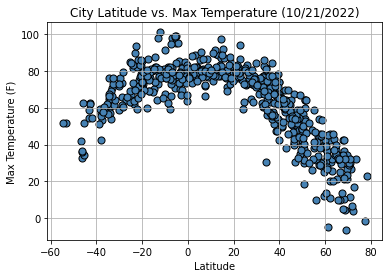

In [12]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black",s=50)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/21/2022)")
plt.grid()
plt.savefig("output_data/KOK-City Latitude vs. Max Temperature.png")

<h1> Analysis of City Latitude vs. Max Temperature </h1>
<h2> Observations </h2>
<li> As the city Latitude gets farther away from Zero(stands for Equator), the Maximum Temperature drops in both the  Hemispheres. </li>
<li> There are more data points on the positive latitudes compared to negative latitudes. This implies that this sample data aligns perfectly with real world data where there more number of cities in Northern Hemmisphere as compared to Southern Hemisphere. </li>


## Latitude vs. Humidity Plot

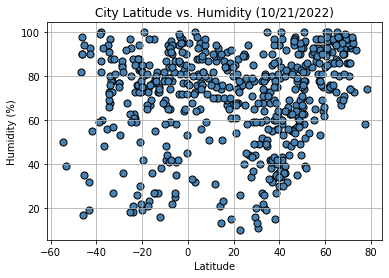

In [13]:
plt.scatter(city_df['Lat'], city_df['Humidity'], marker="o", facecolors="steelblue", edgecolors="black",s=50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/21/2022)")
plt.grid()
plt.savefig("output_data/KOK-City Latitude vs. Humidity.png")

<h1> Analysis of City Latitude vs. Humidity </h1>
<h2> Observations </h2>
<li> There are more humid cities in both Hemispheres in this sample data. </li>
<li> There is no relation between the latitude of the city and its humidity. </li>

## Latitude vs. Cloudiness Plot

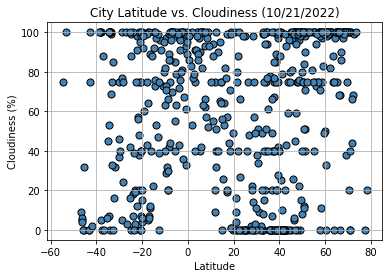

In [14]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (10/21/2022)")
plt.grid()
plt.savefig("output_data/KOK-City Latitude vs. Cloudiness.png")

<h1> Analysis of City Latitude vs. Cloudiness Plot </h1>
<h2> Observations </h2>
<li> The data points are spread all over plot area . There is no way we can make a model to predict anything using this plot.</li>
<li> The above proves there is no relation between the latitude of the cty and its cloudiness.</li>


## Latitude vs. Wind Speed Plot

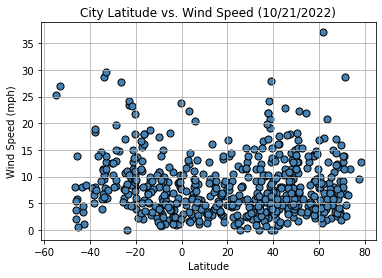

In [15]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", s=50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/21/2022)")
plt.grid()
plt.savefig("output_data/KOK-City Latitude vs. Wind Speed.png")

<h1> Analysis of City Latitude vs. Wind Speed Plot </h1>
<h2> Observations </h2>
<li> Most of the cities have wind speed below 15 miles per hour. </li>
<li>There are few outliers that could be explained by extreme weather events.</li>


## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) >= 0, :]
southern_city_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0, :]
northern_city_df
southern_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.76,94,75,12.66,TO,1666370642
1,Sampit,-2.5333,112.9500,76.01,97,100,1.01,ID,1666370643
4,Busselton,-33.6500,115.3333,54.09,79,69,7.78,AU,1666370645
5,Puerto Nariño,-3.7703,-70.3831,85.46,72,97,2.57,CO,1666370645
10,Mataura,-46.1927,168.8643,32.68,98,5,2.06,NZ,1666370648
...,...,...,...,...,...,...,...,...,...
557,Buriti Bravo,-5.8372,-43.8336,98.74,27,55,4.25,BR,1666370633
562,Labuhan,-6.8844,112.2051,79.32,84,100,7.78,ID,1666370684
563,Masaka,-0.3338,31.7341,66.92,72,95,1.97,UG,1666370933
564,Grand Gaube,-20.0064,57.6608,73.80,75,6,5.99,MU,1666370934


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.97x + 95.53


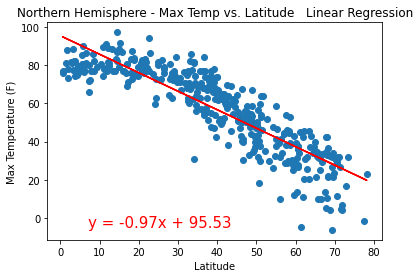

In [42]:
x_values = pd.to_numeric(northern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_city_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,-5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude -  Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 85.11


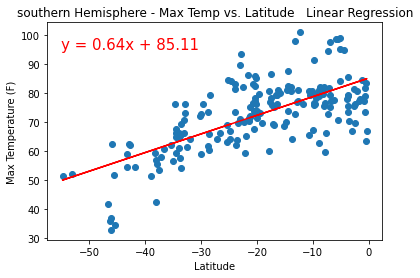

In [43]:
x_values = pd.to_numeric(southern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_city_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('southern Hemisphere - Max Temp vs. Latitude  -  Linear Regression')
plt.show()

<h1> Linear Regression Analysis on Max Temp vs. Latitude for both Hemispheres </h1>
<h2> Observations </h2>
<li> The regression displays a negative correlation in Northern Hemisphere. </li>
<li> The regression displays a positive correlation in Southern Hemisphere. </li>
<li> In the nothern hemisphere, as you move away from the equator the temperature decreases. </li>
<li> In the nothern hemisphere, as you move away from the equator the temperature decreases. </li>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 61.32


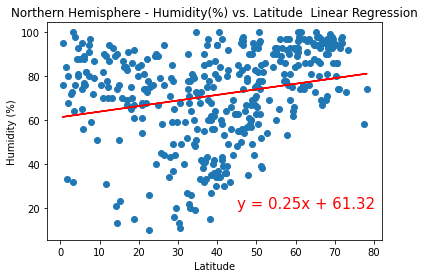

In [44]:
x_values = pd.to_numeric(northern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_city_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude -  Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 70.67


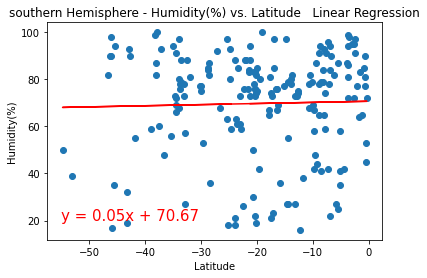

In [45]:
x_values = pd.to_numeric(southern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_city_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('southern Hemisphere - Humidity(%) vs. Latitude -  Linear Regression')
plt.show()

<h1> Linear Regression Analysis on Humidity(%) vs. Latitude for both Hemispheres </h1>
<h2> Observations </h2>
<li> The regression displays a positive correlation in Northern Hemisphere. </li>
<li> The regression displays a positive correlation in Southern Hemisphere. </li>
<li> There is no correlation between Humidity and Latitude in either Hemispheres. </li>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 48.68


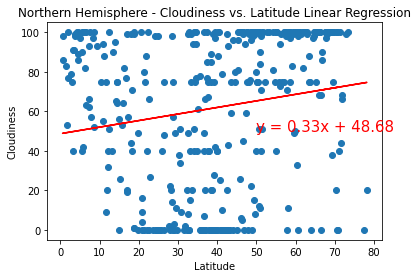

In [41]:
x_values = pd.to_numeric(northern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_city_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude - Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.92x + 79.06


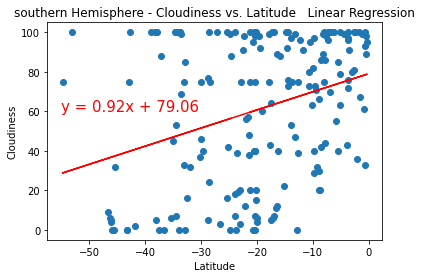

In [40]:
x_values = pd.to_numeric(southern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_city_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('southern Hemisphere - Cloudiness (%) vs. Latitude -  Linear Regression')
plt.show()

<h1> Linear Regression Analysis on Cloudiness (%) vs. Latitude for both Hemispheres </h1>
<h2> Observations </h2>
<li> The regression displays a positive correlation in Northern Hemisphere. </li>
<li> The regression displays a positive correlation in Southern Hemisphere. </li>
<li> There is no correlation between Cloudiness and Latitude in either Hemispheres.  </li>
<li> In the southern hemisphere, the line has higher slope. </li>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.55


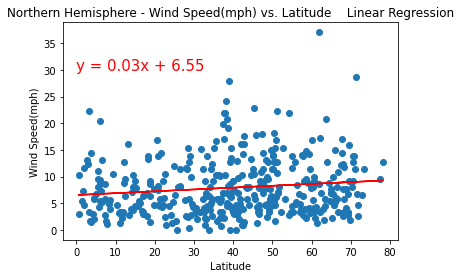

In [33]:
x_values = pd.to_numeric(northern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_city_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude  -  Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 6.5


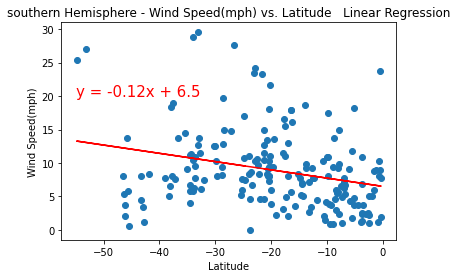

In [46]:
x_values = pd.to_numeric(southern_city_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_city_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('southern Hemisphere - Wind Speed(mph) vs. Latitude -  Linear Regression')
plt.show()

<h1> Linear Regression Analysis on Wind Speed (mph) vs. Latitude for both Hemispheres </h1>
<h2> Observations </h2>
<li> The regression displays a positive correlation in Northern Hemisphere. </li>
<li> The regression displays a negative correlation in Southern Hemisphere. </li>
<li> In the nothern hemisphere, the wind speed remains almost steady as we move away from Equator. </li>
<li> In the southern hemisphere, the wind speed drops as we move towards the equator. </li>